In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

# EDA on train data

In [3]:
# importing the data from csv file
train_data = pd.read_csv("fakenews.csv",sep=',',index_col=0)
train_data


,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [4]:
train_data.columns # checking columns of train dataset


Index(['id', 'headline', 'written_by', 'news', 'label'], dtype='object')

# EDA

In [5]:
train_data.shape  # checking the rows and cols count

(20800, 5)

In [6]:
train_data.columns  # checking the various cols

Index(['id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [7]:
train_data.dtypes   # checking the datatypes of cols

id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

In [8]:
train_data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


### Key Observations here

#### Count is not same for all values . seems there are some null values

In [9]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20800 non-null  int64 
 1   headline    20242 non-null  object
 2   written_by  18843 non-null  object
 3   news        20761 non-null  object
 4   label       20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 975.0+ KB


In [10]:
train_data.isnull() # checking for any null values

,id,headline,written_by,news,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20795,False,True,False,False,False
20796,False,False,False,False,False
20797,False,False,False,False,False
20798,False,False,False,False,False


In [11]:
train_data.isnull().sum() # null  values column wise counts

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

<AxesSubplot:>

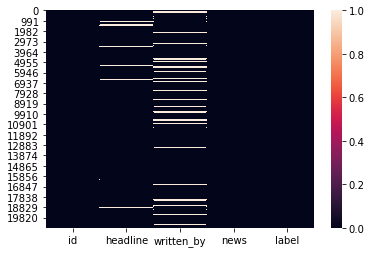

In [12]:
sns.heatmap(train_data.isnull())

### We dont need columns headline and written_by to predict the news if it is fake or not . we only need to preprocess news and predict the label. so we will drop these two columns and will drop rows having null values in news columns

In [13]:
train_data=train_data.drop(columns=['headline', 'written_by'])
train_data

,id,news,label
0,9653,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,Finian Cunningham has written extensively on...,1
...,...,...,...
20795,5671,"No, you'll be a dog licking of the vomit of yo...",1
20796,14831,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,"It’s officially summer, and the Society Boutiq...",0


In [14]:
# dropping rows having null values
train_data=train_data.dropna()
train_data

,id,news,label
0,9653,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,Finian Cunningham has written extensively on...,1
...,...,...,...
20795,5671,"No, you'll be a dog licking of the vomit of yo...",1
20796,14831,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,"It’s officially summer, and the Society Boutiq...",0


# Data Preprocessing 

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

In [17]:
def clean_news(news_text):
    news_text=re.sub(r'http\$+','',news_text) # removing the url
    news_text=re.sub('[^a-zA-Z]',' ',news_text) #removing Numbers and punctuation
    news_text=str(news_text).lower().replace('\\','').replace('_',' ') #converting all to lower case
    news_text=word_tokenize(news_text) #tokenization
    news_text=[item for item in news_text if item not in stop_words] # removing stop words
    news_text=[lemma.lemmatize(word=w,pos='v') for w in news_text] #lemmatization
    news_text=[i for i in news_text if len(i)>=2] # removing the words having length <2
    return news_text

In [18]:
train_data['news']=train_data["news"].apply(lambda x:clean_news(x)) # preprocessing the reviews for further data modelling 

In [19]:
train_data['news']=[" ".join(news_text) for news_text in train_data['news'].values] # converting list to string
train_data

,id,news,label
0,9653,washington sonny perdue tell georgians grow we...,0
1,10041,houston venezuela plan tactical approach desig...,0
2,19113,sunday abc week discuss republican plan repeal...,0
3,6868,augusta beleaguer republican governor maine se...,0
4,7596,finian cunningham write extensively internatio...,1
...,...,...,...
20795,5671,dog lick vomit chinese overlords,1
20796,14831,rixon stewart november rixon stewart nov migra...,1
20797,18142,post eddie know dakota access pipeline protest...,1
20798,12139,officially summer society boutique society mem...,0


In [20]:
train_data["news"][0]

'washington sonny perdue tell georgians grow weary corruption scandals state take governor time give version drain swamp pledge first goal governor restore public trust state government change culture state government mr perdue tell leadership conference kennesaw state university april form government depend mutual bond trust people government people become cynical government mr perdue republican await confirmation serve president trump agriculture secretary become target frequent criticism fail honor ethics pledge eight years governor criticism center fact mr trump continue help run family business venture four company serve governor mr perdue one last cabinet members await senate confirmation date set confirmation hear holdup release paperwork accompany nomination federal office government ethics blame delay office must examine mr perdue proposal avoid conflict interest run department know may include sell farm assets tenure governor end complaints file mr perdue state ethics commiss

In [21]:
train_data.label.value_counts()

0    10387
1    10374
Name: label, dtype: int64

# Data Visualization

Univariate Analysis


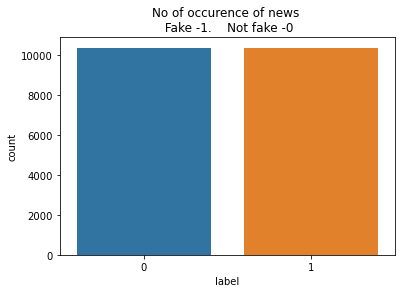

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(train_data['label'])
plt.title("No of occurence of news \n Fake -1.    Not fake -0")
plt.show()

### Above countplot shows the label values are equal i.e count of fake and not fake values are almost equal.

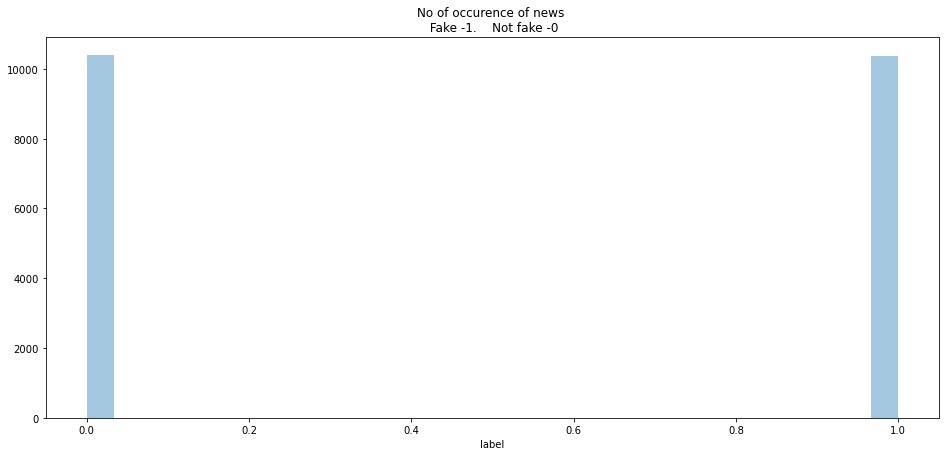

In [43]:
plt.figure(figsize=(16,7))
sns.distplot(train_data['label'],kde=False,bins=30)
plt.title('No of occurence of news \n Fake -1.    Not fake -0' )
plt.show()

In [31]:
from wordcloud import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords

In [32]:
def wordcloud(data,label):
    subset=data[data[label]==1]
    text=subset.news.values
    wc=WordCloud(background_color='black',max_words=4000)
    
    wc.generate(" ".join(text))
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(wc.recolor(colormap='gist_earth',random_state=244),alpha=0.98)

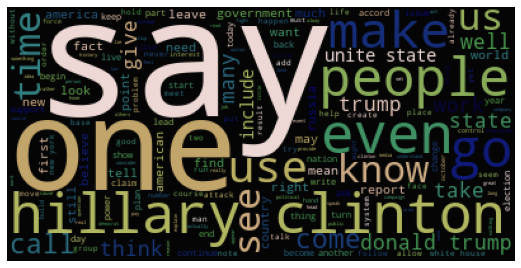

In [34]:
wordcloud(train_data,"label")

## Above wordcloud shows the words frequently used in news feature. 


### Encoding text into vectors for further model training

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(smooth_idf=False,max_features=20000,ngram_range=(1,3),analyzer='word')
X=tfid.fit_transform(train_data["news"])
y=train_data["label"]

In [26]:
X.shape

(20761, 20000)

In [27]:
y.shape

(20761,)

# Data Balancing
#### Label has equal distribution in 0 and 1 . which shows data is quite balanced . so no need to do data balancing 

# Data Modelling


In [28]:
#importing the model training libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=42)

In [31]:
#using algorithms in for loops
model=[LogisticRegression(),MultinomialNB(),LinearSVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Accuracy score of " , m , "is " , accuracy_score(y_test,y_pred))
    print("confusion matrix of " , m , "is \n",confusion_matrix(y_test,y_pred))
    print("classification report of " , m, "is \n",classification_report(y_test,y_pred))
    print("**********************************************************************\n")

Accuracy score of  LogisticRegression() is  0.9516199649737302
confusion matrix of  LogisticRegression() is 
 [[2165  126]
 [  95 2182]]
classification report of  LogisticRegression() is 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2291
           1       0.95      0.96      0.95      2277

    accuracy                           0.95      4568
   macro avg       0.95      0.95      0.95      4568
weighted avg       0.95      0.95      0.95      4568

**********************************************************************

Accuracy score of  MultinomialNB() is  0.9271015761821366
confusion matrix of  MultinomialNB() is 
 [[2172  119]
 [ 214 2063]]
classification report of  MultinomialNB() is 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2291
           1       0.95      0.91      0.93      2277

    accuracy                           0.93      4568
   macro avg       0

## Hyperparameter tuning using GridSearchCv

In [44]:
# LinearSVC is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [34]:
params = {
            'C': [0.1, 0.5, 1.0, 10.0],
         }

linear_svc_grid = GridSearchCV(LinearSVC(random_state=1, max_iter=1000000), param_grid=params, n_jobs=-1, cv=5, verbose=5)
linear_svc_grid.fit(x_train,y_train)

print('Train Accuracy : %.3f'%linear_svc_grid.best_estimator_.score(x_train, y_train))
print('Test Accuracy : %.3f'%linear_svc_grid.best_estimator_.score(x_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%linear_svc_grid.best_score_)
print('Best Parameters : ',linear_svc_grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    9.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.7s finished


Train Accuracy : 0.999
Test Accuracy : 0.965
Best Accuracy Through Grid Search : 0.962
Best Parameters :  {'C': 1.0}


### LinearSVC is performing better with accuracy 90 % and its precision and f1 score are also better than other models . 

In [35]:
# cross validating LinearSVC
from sklearn.model_selection import cross_val_score

score=cross_val_score(linear_svc_grid,X,y,cv=5,scoring='accuracy')
print("Cross Validation Score : ", score,"\n")
print("Mean" , score.mean())
print("Standard Deviation" , score.std())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    6.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.1s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    6.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    5.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.7s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    6.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    5.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.8s finished


Cross Validation Score :  [0.96580785 0.96387283 0.96989403 0.96531792 0.96579961] 

Mean 0.9661384485621509
Standard Deviation 0.002006726617404872


In [39]:
pred=linear_svc_grid.predict(x_test)

# Saving the model- Serialization

In [40]:
print(pred,'\t',y_pred)

[1 1 0 ... 0 1 0] 	 [1 1 1 ... 1 1 1]


In [41]:
# saving the prediction model

import pickle
filename="fakenews.pkl"
pickle.dump(linear_svc_grid,open(filename,'wb'))

In [42]:
ds_pred=pd.DataFrame(data=pred,columns=['label'])
ds_pred

,label
0,1
1,1
2,0
3,1
4,0
...,...
4563,1
4564,0
4565,0
4566,1
